# Sparse Distance Matrices

This code demonstrates how to use sparse distance matrices in ripser.  As you will see, ripser automatically understands the scipy sparse library.  Entries which are not specified in the matrix are assumed to be added at $\infty$.

First, let's import everything we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances
from scipy import sparse

from ripser import ripser
from persim import plot_diagrams
import tadasets

Now, let's add some code that makes a sparse distance matrix from a point cloud.  This function will create a sparse matrix that only include edges whose lengths are below a certain threshold

In [2]:
def makeSparseDM(X, thresh):
    N = X.shape[0]
    D = pairwise_distances(X, metric='euclidean')
    [I, J] = np.meshgrid(np.arange(N), np.arange(N))
    I = I[D <= thresh]
    J = J[D <= thresh]
    V = D[D <= thresh]
    return sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()

Now, let's create a dataset of two noisy circles.  We will create one ripser object which does an ordinary dense filtration wtih a threshold specified, and we will create another ripser object to which we pass a sparse matrix created using the same threshold.  Notice how the same number of edges are added in each one.

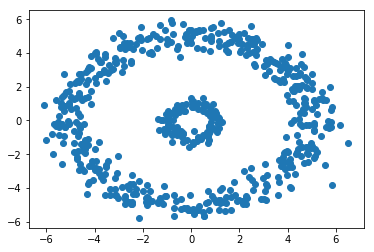

In [3]:
data = np.concatenate([
    tadasets.dsphere(n=500, d=1, r=5, noise=0.5), 
    tadasets.dsphere(n=100, d=1, r=1, noise=0.2)
])

plt.scatter(data[:,0], data[:,1])

In [4]:
thresh = 1.5
results0 = ripser(data, thresh = thresh, maxdim=1)

D = makeSparseDM(data, thresh)
results1 = ripser(D, distance_matrix=True)

print("%i edges added in the dense filtration"%results0['num_edges'])
print("%i edges added in the sparse filtration"%results1['num_edges'])

12920 edges added in the dense filtration
12920 edges added in the sparse filtration


Now let's look at the persistence diagrams.  They are indeed the same!

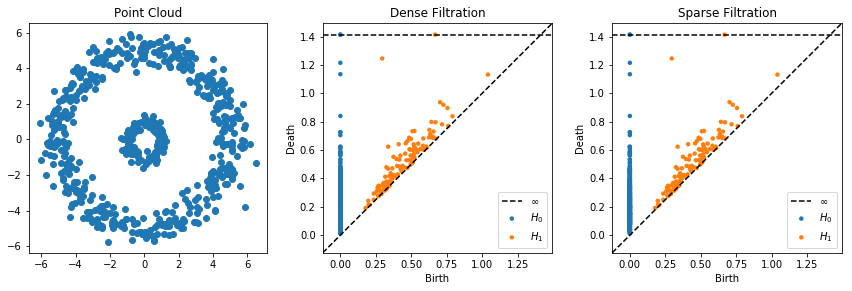

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Point Cloud")
plt.subplot(132)
plot_diagrams(results0['dgms'], show=False)
plt.title("Dense Filtration")
plt.subplot(133)
plt.title("Sparse Filtration")
plot_diagrams(results1['dgms'], show=False)
plt.tight_layout()
plt.show()